# 공통파일


In [6]:
import warnings
warnings.filterwarnings("ignore")
import os
from os.path import join
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train = pd.read_csv('~/_Python/Exploration/data/energy/train.csv', encoding = "cp949")
test = pd.read_csv('~/_Python/Exploration/data/energy/test.csv', encoding = "cp949")
train.columns = ['num', 'date', 'use_electric', 'temperature', 'wind_speed', 'humidity', 'precipitation', 'sunshine', 'operation', 'solar_power']
train['date']= pd.to_datetime(train['date'])


# 1. 데이타 분석

In [9]:
train.shape

(122400, 10)

In [10]:
train.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [11]:
train.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유'],
      dtype='object')

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   num         122400 non-null  int64  
 1   date_time   122400 non-null  object 
 2   전력사용량(kWh)  122400 non-null  float64
 3   기온(°C)      122400 non-null  float64
 4   풍속(m/s)     122400 non-null  float64
 5   습도(%)       122400 non-null  float64
 6   강수량(mm)     122400 non-null  float64
 7   일조(hr)      122400 non-null  float64
 8   비전기냉방설비운영   122400 non-null  float64
 9   태양광보유       122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB


In [13]:
train.describe()

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
count,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000
mean,30.500000,2324.830866,24.251713,2.151641,80.169848,0.514989,0.213533,0.683333,0.483333
std,17.318173,2058.999326,3.407902,1.514475,15.525862,2.624505,0.370517,0.465178,0.499724
min,1.000000,0.000000,11.100000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,15.750000,1055.268000,21.800000,1.100000,70.000000,0.000000,0.000000,0.000000,0.000000
50%,30.500000,1700.352000,24.200000,1.900000,84.000000,0.000000,0.000000,1.000000,0.000000
75%,45.250000,2780.487000,26.500000,2.900000,93.000000,0.000000,0.300000,1.000000,1.000000
max,60.000000,17739.225000,36.300000,20.100000,100.000000,81.500000,1.000000,1.000000,1.000000


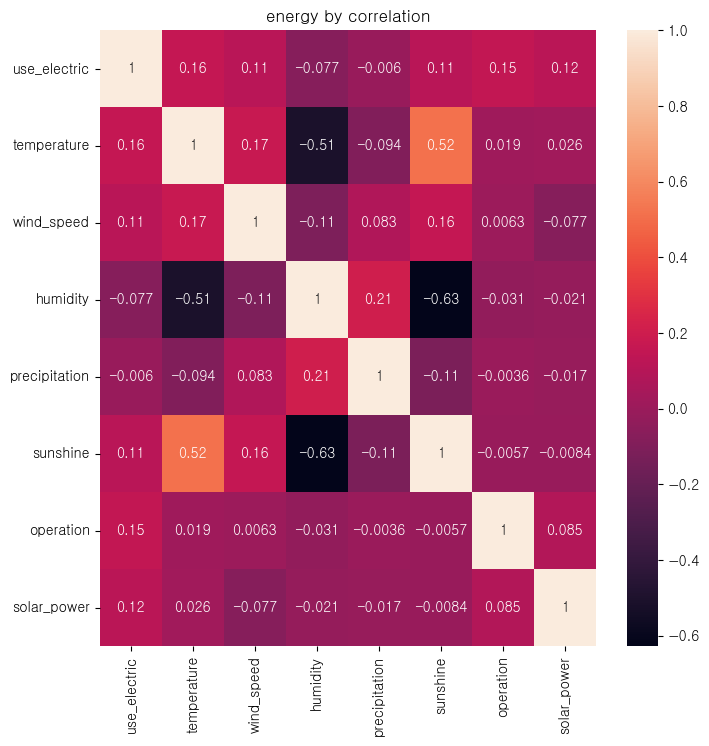

In [33]:
corr_df= train[['use_electric', 'date', 'temperature', 'wind_speed', 'humidity', 'precipitation', 'sunshine', 'operation', 'solar_power']]

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.figure(figsize=(8,8))

sns.heatmap(data=corr_df.corr(), annot=True)
plt.title('energy by correlation')
plt.show()


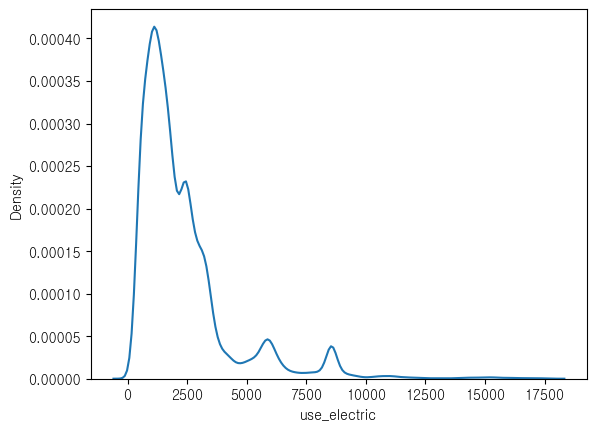

In [34]:
sns.kdeplot(data=train['use_electric'])
plt.show()

In [35]:
train['use_electric'].skew()  #왜도 : 분포가 대칭을 벗어나 치우친 정도

2.569979214229397

In [36]:
train['use_electric'].kurt()  # 첨도 : 뽀족한 정도

8.998589167827355

## feature 별 전력사용량과의 관계

In [ ]:
train= train[]

In [20]:
# CATE_COLS = ['num', "mgrp", 'holiday', 'dow', 'cluster', 'hot', 'nelec_cool_flag', 'solar_flag']
# for col in CATE_COLS:
#     df[col] = df[col].astype(str).astype('category')





In [24]:
train.head()

,num,date,use_electric,temperature,wind_speed,humidity,precipitation,sunshine,operation,solar_power
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


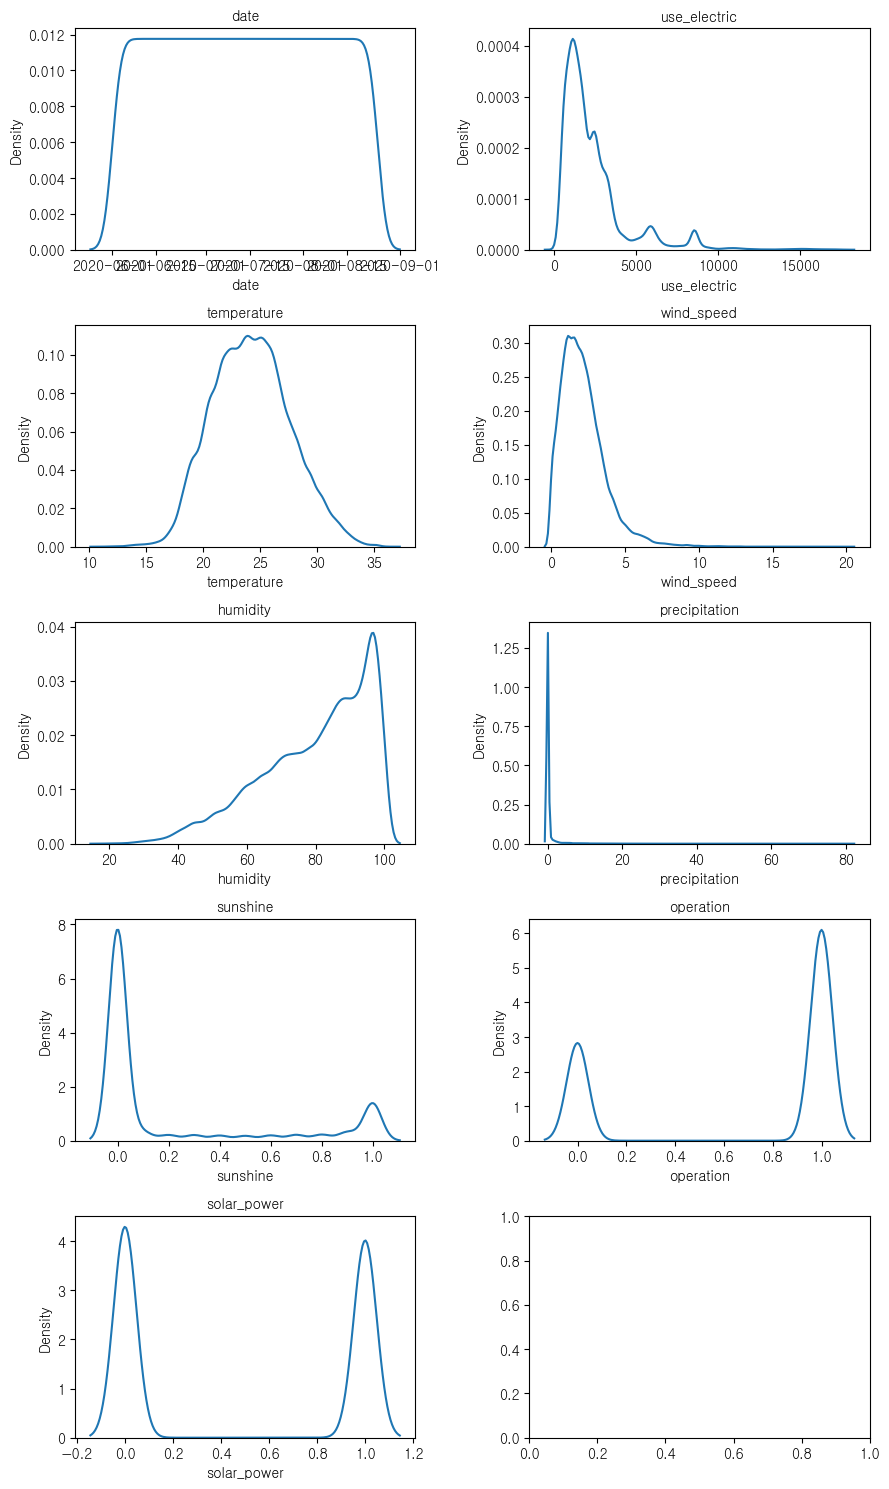

In [27]:
skew_columns = ['date', 'use_electric', 'temperature', 'wind_speed', 'humidity', 'precipitation', 'sunshine', 'operation', 'solar_power']

fig, ax = plt.subplots(5, 2, figsize=(9, 15), tight_layout=True)

count = 0
for row in range(5):
    for col in range(2):
        if count == 9:
            break
        sns.kdeplot(data=train[skew_columns[count]], ax=ax[row][col] )
        ax[row][col].set_title(skew_columns[count], fontsize=10)
        count += 1

In [ ]:
## 개별 컬럼 분석

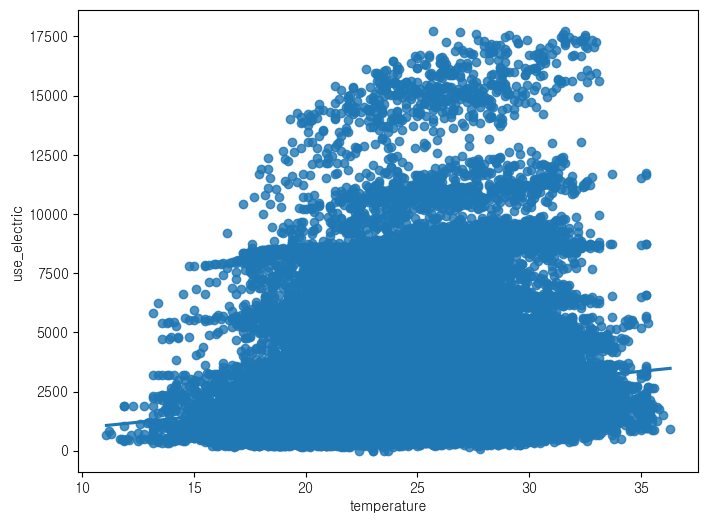

In [32]:
#'date', 'use_electric', 'temperature', 'wind_speed', 'humidity', 'precipitation', 'sunshine', 'operation', 'solar_power'
data = pd.concat([train['use_electric'], train['temperature']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='temperature', y="use_electric", data=data)

# 2.모델링 전략 수립

# 3. 전처리

# 4. Normalization

# 5.모델링

# 6.하이퍼 파라미터 

# 7.훈련 및 예측 Blending

# 8. 파일 출력 및 제출

# 9.회고